In [57]:
import pandas as pd

In [58]:
# tsv 파일 로드
chipo = pd.read_csv("../../csv/num_1/chipotle.tsv", sep="\t")
chipo

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
...,...,...,...,...,...
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75


1. order_id컬럼은 숫자의 의미를 가지지 않는 컬럼이기 때문에 문자형 변경
2. 가장 많이 주문한 item_name과 그 수량을 출력
3. item당 주문 총량을 구하고 바형 그래프로 시각화
4. item_price를 float의 형태로 변환
5. 주문당 평균 계산 금액 출력
6. 각 아이템의 가격을 출력한 후에 가격 분포 그래프 / 가격 히스토그램 출력
7. "Chicken Bowl"을 2개 이상 주문한 고객들의 "Chicken Bowl" 메뉴의 총 주문 수량 출력

In [59]:
## order_id 컬럼의 데이터를 문자열 변환
chipo["order_id"] = chipo["order_id"].astype(str)

In [60]:
## 가장 많이 주문한 item_name과 수량을 출력
# chipo.groupby("item_name").sum()["quantity"]
item_count =  chipo['item_name'].value_counts()

In [61]:
## 가장 많이 주문한 item : top10 출력하려면?
item_count.head(10)

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [62]:
item_count[:10]

Chicken Bowl                    726
Chicken Burrito                 553
Chips and Guacamole             479
Steak Burrito                   368
Canned Soft Drink               301
Chips                           211
Steak Bowl                      211
Bottled Water                   162
Chicken Soft Tacos              115
Chips and Fresh Tomato Salsa    110
Name: item_name, dtype: int64

In [63]:
## 주문 횟수가 가장 많은 메뉴를 출력
chipo['item_name'].value_counts().index.tolist()[0]

'Chicken Bowl'

In [64]:
## item_name의 주문 총량
item_quantity = chipo.groupby("item_name").sum()["quantity"]

In [65]:
## 주문 총량을 바형 그래프로 출력
import matplotlib.pyplot as plt
import numpy as np

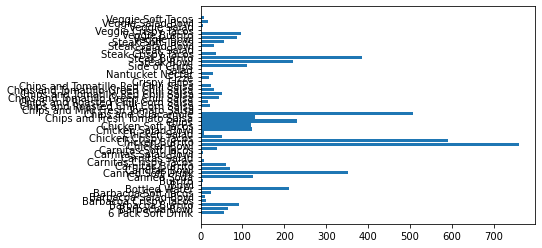

In [66]:
x = item_quantity.index
y = item_quantity

plt.barh(x, y)
plt.show()

In [67]:
## item_price 컬럼은 $ xx.xxx 
## float의 형태로 변환
## $ 삭제
## 타입을 float

# case1 
chipo['item_price'].str.replace("$", "").astype(float)

# case2
chipo["item_price"].str.lstrip('$').astype(float)

# case3
chipo["item_price"].apply(lambda x : float(x.replace("$", "")))

# case4
def change(x):
    result = float(x.replace("$", ""))
    return result

chipo["item_price"] = chipo["item_price"].apply(change)

In [68]:
chipo.describe()

,quantity,item_price
count,4622.000000,4622.000000
mean,1.075725,7.464336
std,0.410186,4.245557
min,1.000000,1.090000
25%,1.000000,3.390000
50%,1.000000,8.750000
75%,1.000000,9.250000
max,15.000000,44.250000


In [69]:
# 각 아이템의 가격을 출력
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",10.98
6,3,1,Side of Chips,NaN,1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",9.25


In [70]:
## 수량이 1개인 데이터를 출력
chipo[chipo["quantity"] == 1]
chipo_one_item = chipo.query("quantity == 1")

In [85]:
## item_name을 기준으로 그룹화 하고 item_price의 최솟값을 구하면 아이템당 가격을 추출
price_per_item = chipo_one_item.groupby('item_name').min()
price_per_item

,order_id,quantity,choice_description,item_price
item_name,,,,
6 Pack Soft Drink,1076,1,[Coke],6.49
Barbacoa Bowl,1000,1,"[Fresh Tomato (Mild), [Lettuce, Black Beans, R...",8.69
Barbacoa Burrito,1002,1,"[Fresh Tomato (Mild), [Black Beans, Rice, Sour...",8.69
Barbacoa Crispy Tacos,110,1,"[Fresh Tomato Salsa, Guacamole]",8.99
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99
Bottled Water,1009,1,NaN,1.09
Bowl,279,1,"[Adobo-Marinated and Grilled Steak, [Sour Crea...",7.40
Burrito,214,1,"[Adobo-Marinated and Grilled Chicken, Pinto Be...",7.40


In [72]:
## item당 가격이 큰것부터 상위 10개를 출력?
price_per_item.sort_values('item_price', ascending=False).head(10)

price_per_item.sort_values('item_price', ascending=False)[:10]

,order_id,quantity,choice_description,item_price
item_name,,,,
Steak Salad Bowl,1032,1,"[Fresh Tomato Salsa, Lettuce]",9.39
Barbacoa Salad Bowl,1283,1,"[Fresh Tomato Salsa, Guacamole]",9.39
Carnitas Salad Bowl,1035,1,"[Fresh Tomato Salsa, [Rice, Black Beans, Chees...",9.39
Carnitas Soft Tacos,1011,1,"[Fresh Tomato Salsa (Mild), [Black Beans, Rice...",8.99
Carnitas Crispy Tacos,1774,1,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",8.99
Steak Soft Tacos,1054,1,"[Fresh Tomato Salsa (Mild), [Cheese, Sour Cream]]",8.99
Carnitas Salad,1500,1,"[[Fresh Tomato Salsa (Mild), Roasted Chili Cor...",8.99
Carnitas Bowl,1007,1,"[Fresh Tomato (Mild), [Guacamole, Lettuce, Ric...",8.99
Barbacoa Soft Tacos,1103,1,"[Fresh Tomato Salsa, [Black Beans, Cheese, Let...",8.99


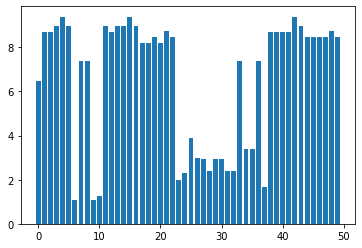

In [73]:
## 아이템 가격 분포 그래프 출력
## 바형 그래프 
x = price_per_item.index
x_pos = np.arange(len(x))
y = price_per_item['item_price']

plt.bar(x_pos, y)
plt.show()

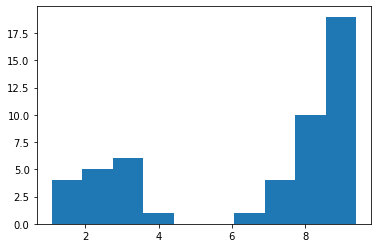

In [74]:
## 히스토그램 출력
plt.hist(y)
plt.show()

In [75]:
# "chicken bowl"을 2개 이상 주문한 고객들의 'chicken bowl' 메뉴의 총 주문 수량

## chicken bowl 만 출력
chipo_chicken = chipo[chipo["item_name"] == 'Chicken Bowl']

In [76]:
len(chipo_chicken)

726

In [77]:
## order_id를 기준으로 그룹화 하여 주문 수량 합계를 출력
chipo_chicken_ordersum = chipo_chicken.groupby('order_id').sum()["quantity"]

In [78]:
len(chipo_chicken_ordersum)

615

In [79]:
chipo_chicken_ordersum[chipo_chicken_ordersum >= 2]

order_id
1004    2
1023    2
1072    2
1078    2
1091    2
       ..
972     2
973     3
983     2
986     2
997     2
Name: quantity, Length: 114, dtype: int64